In [17]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [18]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
import csv
train_tweets = pd.read_csv('traindata.csv',encoding='latin-1')
test_tweets = pd.read_csv('testdata.csv', encoding='latin-1')

In [20]:
print(train_tweets.shape)
print(test_tweets.shape)
print(train_tweets.describe())
print(test_tweets.describe())

(31962, 3)
(17197, 2)
                 id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000
                 id
count  17197.000000
mean   40561.000000
std     4964.490625
min    31963.000000
25%    36262.000000
50%    40561.000000
75%    44860.000000
max    49159.000000


In [21]:
print(train_tweets.groupby('label').size())
#print(test_tweets.groupby('label').size())

label
0    29720
1     2242
dtype: int64


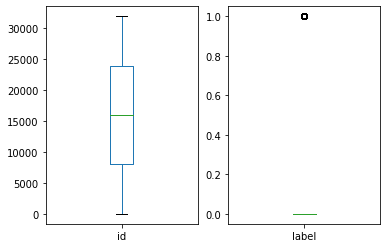

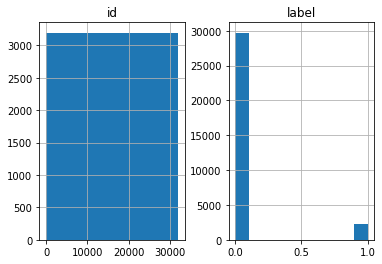

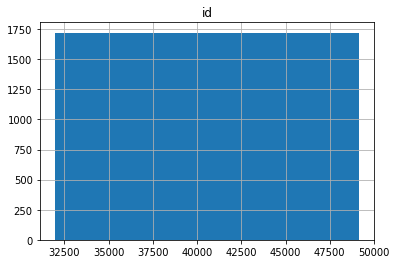

In [6]:
train_tweets.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
pyplot.show()
train_tweets.hist()
pyplot.show()
test_tweets.hist()
pyplot.show()

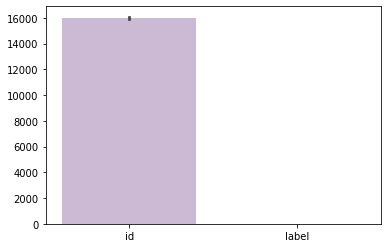

In [7]:
sns.barplot(data = train_tweets,palette='PRGn')
plt.show()

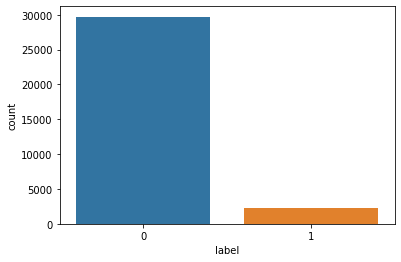

In [8]:
sns.countplot(x= 'label',data = train_tweets)
plt.show()

In [22]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [24]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print("NAIVE BAYES MODEL")
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

NAIVE BAYES MODEL
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6340
           1       0.12      1.00      0.22        53

    accuracy                           0.94      6393
   macro avg       0.56      0.97      0.60      6393
weighted avg       0.99      0.94      0.96      6393

[[5966  374]
 [   0   53]]
0.9414985139996872


In [25]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ Decision Tree classifier
])

In [26]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print("DECISION TREE CLASSIFIER MODEL")
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

DECISION TREE CLASSIFIER MODEL
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5980
           1       0.59      0.61      0.60       413

    accuracy                           0.95      6393
   macro avg       0.78      0.79      0.78      6393
weighted avg       0.95      0.95      0.95      6393

[[5804  176]
 [ 162  251]]
0.9471296730799311


In [27]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier()),  # train on TF-IDF vectors w/ KNN classifier
])

In [28]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print("KNN MODEL")
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

KNN MODEL
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      6252
           1       0.31      0.94      0.46       141

    accuracy                           0.95      6393
   macro avg       0.65      0.94      0.72      6393
weighted avg       0.98      0.95      0.96      6393

[[5957  295]
 [   9  132]]
0.9524479899890506


In [29]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [30]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print("SVM MODEL")
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

SVM MODEL
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6206
           1       0.43      0.98      0.60       187

    accuracy                           0.96      6393
   macro avg       0.72      0.97      0.79      6393
weighted avg       0.98      0.96      0.97      6393

[[5963  243]
 [   3  184]]
0.9615204129516659
